# Week:3 Data pre-processing 

### Objective:
The objective of this assignment is to perform exploratory data analysis, data pre-processing, data cleaning, scaling, transformation, check correlation between variables and perform sampling.

We use the Fatal Police Shooting data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [119]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
import warnings

# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

In [121]:
# Load the dataframe 
df = pd.read_csv('C:/Users/User/Downloads/week_3_assignment.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


In [122]:
# Check the shape of the dataset
df.shape

(4478, 16)

### Question: 1 ( 1 Mark )

Check and Handle the missing values (NaN) present in each column with the respective methods 

In [123]:
# Check for missing values
print(df.isnull().sum())

id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
year                         0
dtype: int64


In [124]:
# Impute missing values in categorical columns with the most frequent value
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Impute missing values in numerical columns with the mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [125]:
# Check for missing values again
print(df.isnull().sum())

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
age_categories             0
year                       0
dtype: int64


### Question: 2 (1 Mark )
Handle the outliers present in the age column 

Text(0.5, 1.0, 'Box Plot of Age (Before Handling Outliers)')

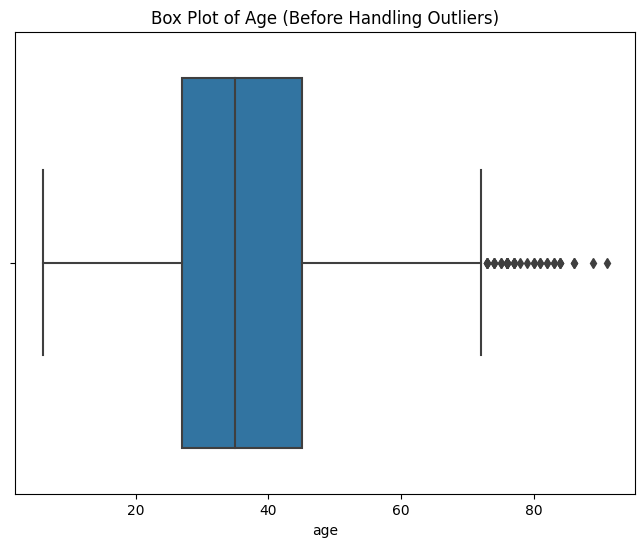

In [126]:
# Display the box plot before handling outliers in the age column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age (Before Handling Outliers)')

In [127]:
# Calculate the interquartile range (IQR)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

18.0


In [128]:
# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

72.0
0.0


In [129]:
outliers = []
for i in df['age']:
    if (i<lower_case or i>upper_case):
        outliers.append(i)

In [130]:
print(outliers)

[75.0, 74.0, 77.0, 83.0, 76.0, 86.0, 76.0, 77.0, 76.0, 76.0, 80.0, 82.0, 86.0, 76.0, 83.0, 73.0, 91.0, 73.0, 79.0, 74.0, 75.0, 82.0, 76.0, 78.0, 84.0, 84.0, 81.0, 89.0, 73.0, 77.0, 76.0, 84.0, 81.0, 80.0, 77.0, 76.0, 74.0, 76.0, 73.0]


In [131]:
# Remove outliers in the age column
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot of Age (After Handling Outliers)')

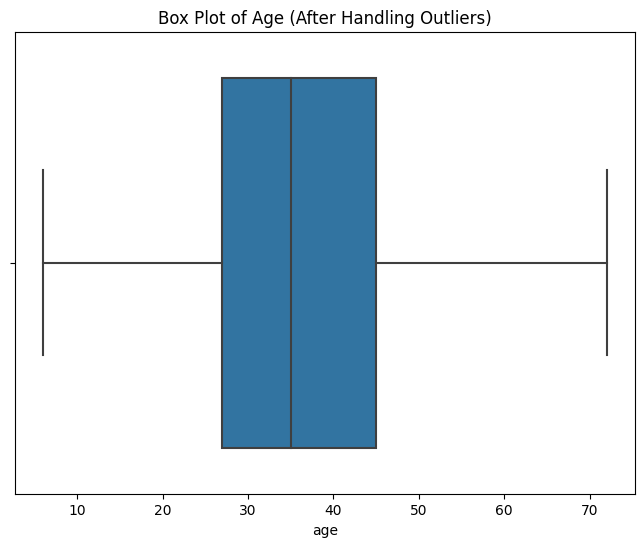

In [132]:
# Display the box plot after handling outliers in the age column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age (After Handling Outliers)')


In [133]:
# Check for outliers in the age column
print(df['age'].describe())
# Drop the outliers
df = df[(df['age'] > df['age'].quantile(0.01)) & (df['age'] < df['age'].quantile(0.99))]
# Check for outliers again
print(df['age'].describe())

count    4439.000000
mean       36.511963
std        12.250550
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        72.000000
Name: age, dtype: float64
count    4340.000000
mean       36.321568
std        11.612719
min        17.000000
25%        27.000000
50%        35.000000
75%        44.000000
max        67.000000
Name: age, dtype: float64


### Question: 3 ( 1 Mark )
Plot a bar graph which tells most repeated weapons used to attack the people  

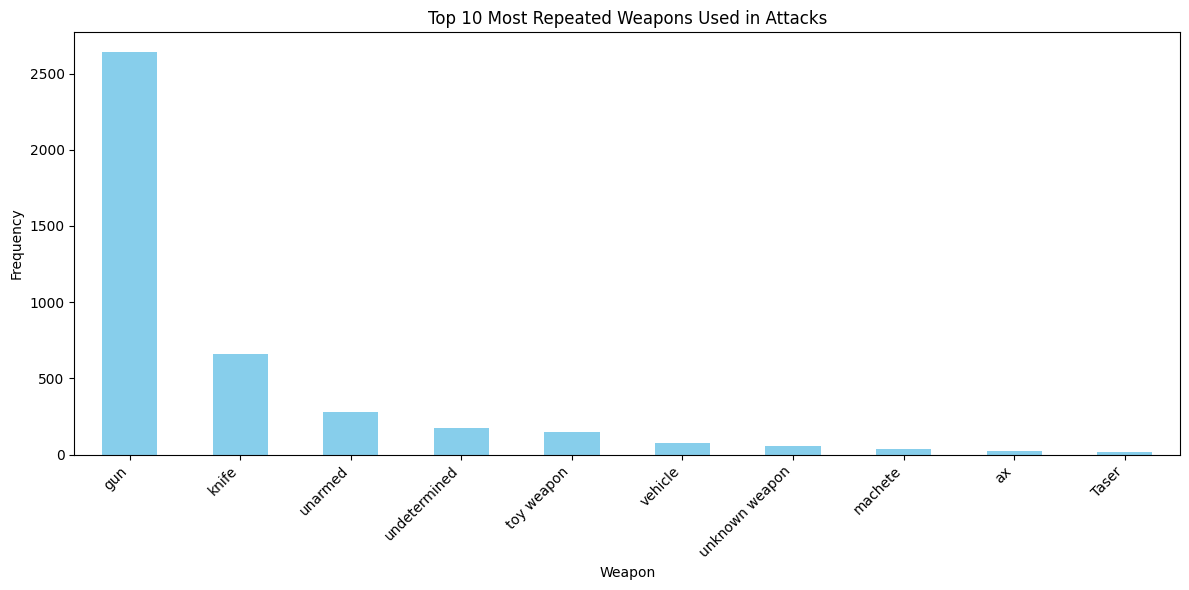

In [134]:
# Group the data by the 'armed' column and count the occurrences
weapon_counts = df['armed'].value_counts()

# Get the top N most repeated weapons (e.g., top 10)
top_n = 10
top_weapons = weapon_counts.head(top_n)

# Create a bar plot for the top weapons
plt.figure(figsize=(12, 6))
top_weapons.plot(kind='bar', color='skyblue')
plt.title('Top {} Most Repeated Weapons Used in Attacks'.format(top_n))
plt.xlabel('Weapon')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Question: 4 ( 2 Marks )
Generate a bar plot to identify days in which the count of attacks are reported most 

In [135]:
# Create a new columns day, month, year using date column with the help of pandas to_datetime method
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

Method 1

Text(0.5, 1.0, 'Day wise # of Attacks')

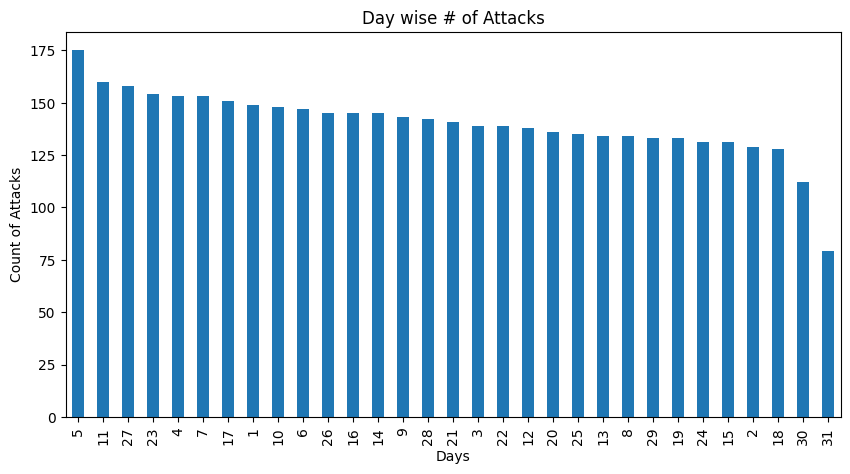

In [136]:
df['day'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Count of Attacks')
plt.title('Day wise # of Attacks')

Method 2

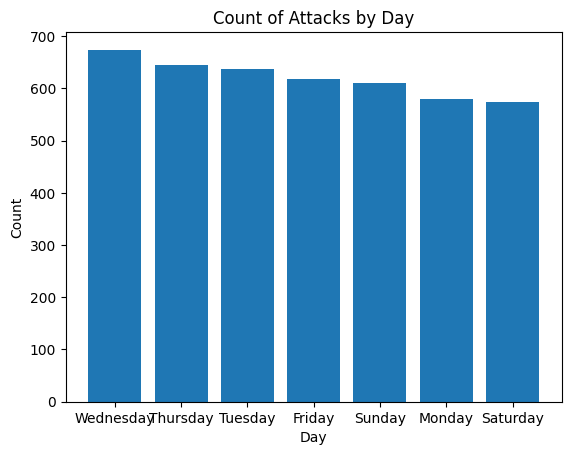

In [137]:
# Convert the date column to a datetime
df['date'] = pd.to_datetime(df['date'])
# Create a new attribute for 'days'
df['day'] = df['date'].dt.day_name()
# Get the count of attacks for each day
day_counts = df['day'].value_counts()
# Plot a bar plot
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Attacks by Day')
plt.show()

Q4 as mentioned in the portal

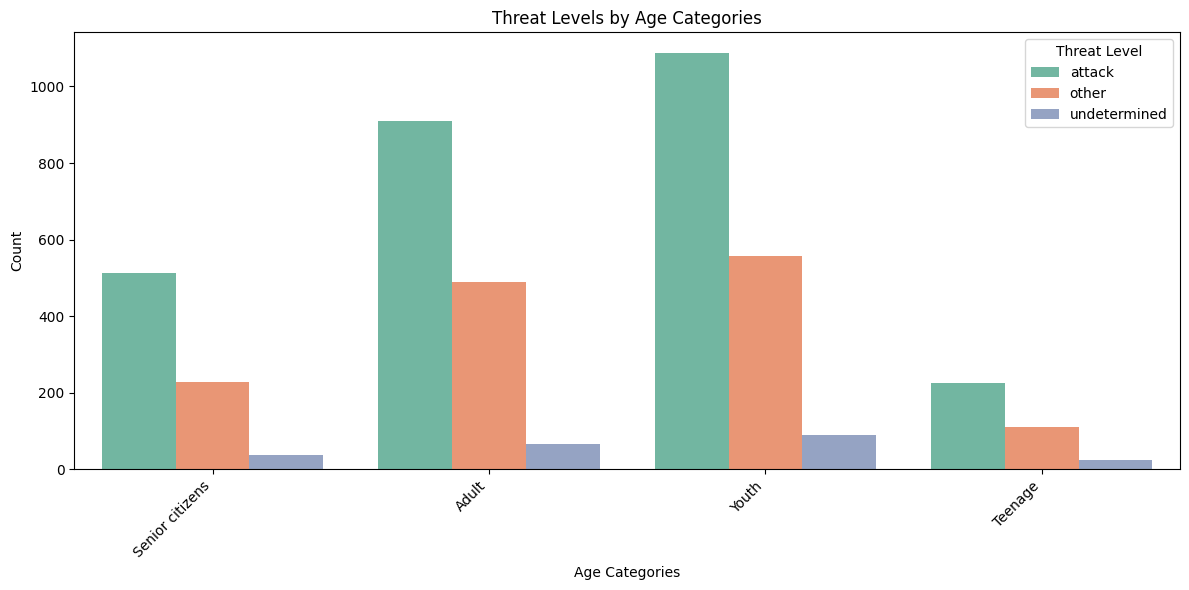

In [138]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_categories', hue='threat_level', palette='Set2')
plt.title('Threat Levels by Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Threat Level')
plt.tight_layout()

# Show the plot
plt.show()

### Question: 5 ( 2 Marks )
Display the Top 10 states where the high number of cases recorded 

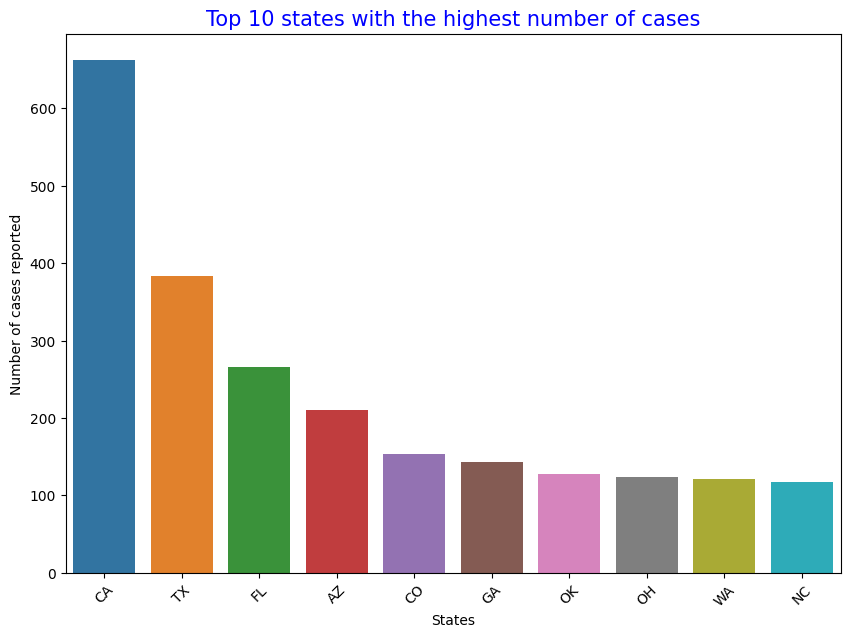

In [139]:
# Group by state and count the number of cases, then sort in descending order
state = df['state'].value_counts().sort_values(ascending=False)

# Select the top 10 states
top_10_states = state.head(10)

# Display the Top 10 states using a bar chart
plt.figure(figsize=(10, 7))
sns.barplot(x=top_10_states.index, y=top_10_states.values)
plt.ylabel('Number of cases reported')
plt.xlabel('States')
plt.title('Top 10 states with the highest number of cases', color='blue', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Question: 6 ( 1 Mark )
Drop the features that have more unique string values and not relevant to the model.

In [140]:
# Read the DataFrame from the CSV file
df = pd.read_csv('C:/Users/User/Downloads/week_3_assignment.csv')

# Dropping the 'id', 'name', and 'date' columns
# - 'id' is often a unique identifier and may not be useful for analysis.
# - 'name' may contain individual names, which are usually not used for analysis.
# - 'date' might represent the date of the record, but it's often not needed for certain analyses.
df = df.drop(['id', 'name', 'date'], axis=1)

# Now, df contains the DataFrame with the specified columns dropped.

# Display the top 5 rows of the dataset
df.head(5)

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


### Question: 7 ( 2 Marks )
Create a line plot that shows the number of attacks every year according to race

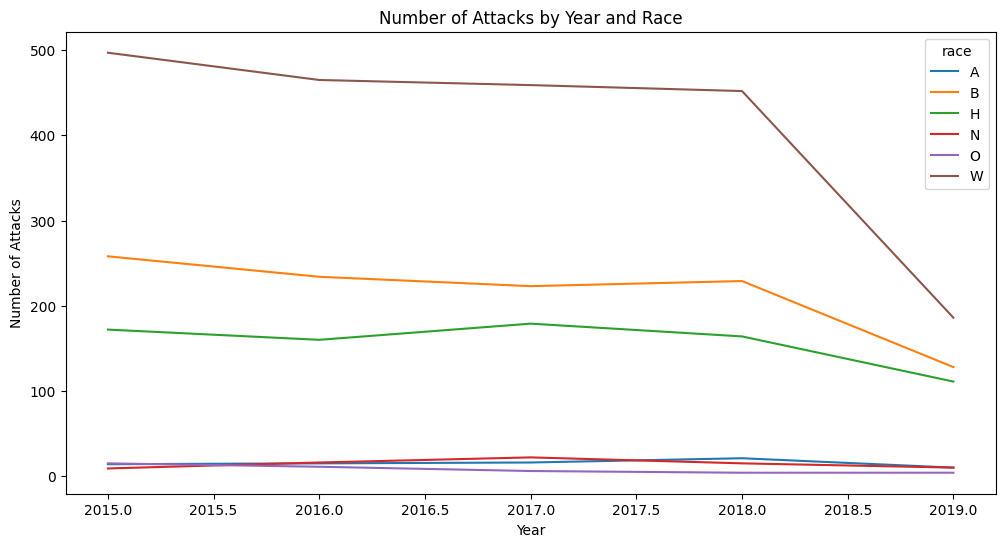

In [141]:
# Create a crosstab of 'year' and 'race' columns and plot a line chart
pd.crosstab(df['year'], df['race']).plot.line(figsize=(12, 6))

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year and Race')

# Show the plot
plt.show()

In [142]:
# Assuming your DataFrame is named df and you want to save it as 'week_4_assignment.csv'
df.to_csv('week_4_assignment.csv', index=False)


## Thank you!